# Methane detection hackathon

### Goal : detect methane leaks in the atmosphere based on satelite images

It's a binary classification problem : does the image contain a plume of methane or not ?

In order to do that, a dataset containing images in `tif` format is provided along with metadata including :
* path
* date the satelite image was taken
* class (`plume` or `no_plume`)
* an ID identifying the location
* latitude and longitude coordinates locating the center of the plume (`lat`,`lon`)
* pixel coordinates locating the center of the plume in the image (`coord_x`,`coord_y`). Please be midnful that the axis origin (0,0) is at the top left corner of the image

The dataset contains two folders:
- `plume` : contains all images with plumes of methane.
- `no_plume` : contains all images with no plume of methane.


**All images have a resolution of 64x64 and they are in gray scale (2D-arrays).**

Images names are written in the following format `{date}_methane_mixing_ratio_id_{location id}.tif`

In [43]:
len(pd.read_csv("metadata.csv"))

430

### 1. Install requirements

In [ ]:
!pip install rasterio, pandas

### 2. Import statements

In [29]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.plot import show, show_hist
import warnings
warnings.filterwarnings("ignore", category=rasterio.errors.NotGeoreferencedWarning)

### 3. Read an image

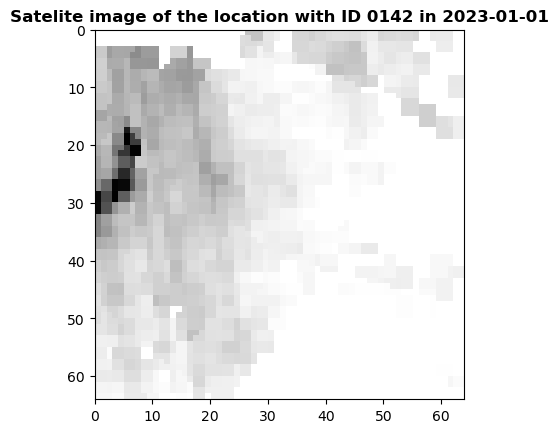

<Axes: title={'center': 'Satelite image of the location with ID 0142 in 2023-01-01'}>

In [30]:
path = "images/plume/20230101_methane_mixing_ratio_id_4928.tif"
example_image = rasterio.open(path)
show(example_image, cmap="Greys", title="Satelite image of the location with ID 4928 in 2023-01-01")

### 4. Distribution of pixel intensity in greyscale

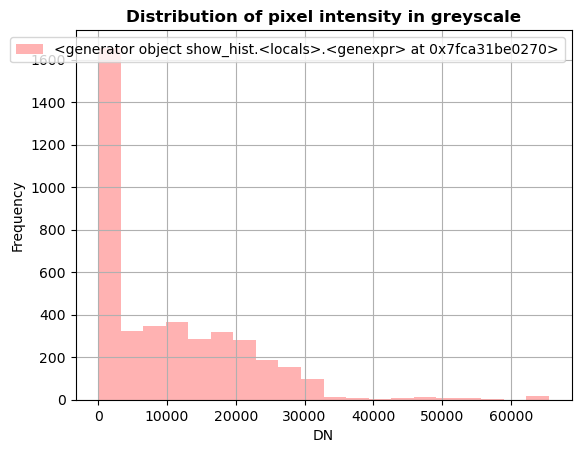

In [39]:
show_hist(example_image, bins=20, alpha=0.3, title="Distribution of pixel intensity in greyscale")

### 5. Metadata

In [40]:
metadata = pd.read_csv("metadata.csv")

In [41]:
metadata.head(5)

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
0,20230223,id_6675,yes,train,31.528750,74.330625,24,47,images/plume/20230223_methane_mixing_ratio_id_...
1,20230103,id_2542,yes,train,35.538000,112.524000,42,37,images/plume/20230103_methane_mixing_ratio_id_...
2,20230301,id_6546,yes,train,21.060000,84.936667,58,15,images/plume/20230301_methane_mixing_ratio_id_...
3,20230225,id_6084,yes,train,26.756667,80.973333,28,62,images/plume/20230225_methane_mixing_ratio_id_...
4,20230105,id_2012,yes,train,34.800000,40.770000,59,44,images/plume/20230105_methane_mixing_ratio_id_...
